# <h2 style = "font-family: Georgia;font-weight: bold; font-size: 30px; color: #1192AA; text-align:left">Import</h2>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from copy import deepcopy
from functools import partial
from itertools import combinations
import random
import gc

# Import sklearn classes for model selection, cross validation, and performance evaluation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF
from umap import UMAP
from sklearn.manifold import TSNE

# Import libraries for Hypertuning
import optuna

# Import libraries for gradient boosting
import xgboost as xgb
import lightgbm as lgb
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from catboost import Pool

# Useful line of code to set the display option so we could see all the columns in pd dataframe
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

 # <h2 style = "font-family: Georgia;font-weight: bold; font-size: 30px; color: #1192AA; text-align:left">Check Dataset</h2>

In [2]:
PATH_ORIGIN = '/kaggle/input/vector-borne-disease-prediction/trainn.csv'
PATH_TRAIN = '/kaggle/input/playground-series-s3e13/train.csv'
PATH_TEST = '/kaggle/input/playground-series-s3e13/test.csv'
PATH_SUB = '/kaggle/input/playground-series-s3e13/sample_submission.csv'

origin = pd.read_csv(PATH_ORIGIN)
train =  pd.read_csv(PATH_TRAIN).drop(columns='id')
test =   pd.read_csv(PATH_TEST).drop(columns='id')

train['is_generated'] = 1
test['is_generated'] = 1
origin['is_generated'] = 0

origin.prognosis = origin.prognosis.str.replace(' ', '_')

In [3]:
print(f'[INFO] Shapes:'
      f'\n origin: {origin.shape}'
      f'\n train: {train.shape}'
      f'\n test: {test.shape}\n')

print(f'[INFO] Any missing values:'
      f'\n origin: {origin.isna().any().any()}'
      f'\n train: {train.isna().any().any()}'
      f'\n test: {test.isna().any().any()}')

[INFO] Shapes:
 origin: (252, 66)
 train: (707, 66)
 test: (303, 65)

[INFO] Any missing values:
 origin: False
 train: False
 test: False


In [4]:
full_train = pd.concat([train, origin], axis=0).reset_index(drop=True)

In [5]:
train.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis,is_generated
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease,1
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis,1
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease,1
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever,1


In [6]:
train.columns

Index(['sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed', 'muscle_pain',
       'joint_pain', 'vomiting', 'rash', 'diarrhea', 'hypotension',
       'pleural_effusion', 'ascites', 'gastro_bleeding', 'swelling', 'nausea',
       'chills', 'myalgia', 'digestion_trouble', 'fatigue', 'skin_lesions',
       'stomach_pain', 'orbital_pain', 'neck_pain', 'weakness', 'back_pain',
       'weight_loss', 'gum_bleed', 'jaundice', 'coma', 'diziness',
       'inflammation', 'red_eyes', 'loss_of_appetite', 'urination_loss',
       'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin',
       'yellow_eyes', 'facial_distortion', 'microcephaly', 'rigor',
       'bitter_tongue', 'convulsion', 'anemia', 'cocacola_urine',
       'hypoglycemia', 'prostraction', 'hyperpyrexia', 'stiff_neck',
       'irritability', 'confusion', 'tremor', 'paralysis', 'lymph_swells',
       'breathing_restriction', 'toe_inflammation', 'finger_inflammation',
       'lips_irritation', 'itchiness', 'ulcers',

# <h2 style = "font-family: Georgia;font-weight: bold; font-size: 30px; color: #1192AA; text-align:left">EDA</h2>

In [7]:
# Create figure
fig = px.histogram(train['prognosis'],
                   template='plotly_dark',
                   color_discrete_sequence = ['#1192AA'])



# Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Disease",
    yaxis_title="Frequency",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Train Prognosis Distribution",
        'y':0.95,
        'x':0.5
        }
    )

# Display
fig.show()

In [8]:
# Create figure
fig = px.histogram(origin['prognosis'],
                   template='plotly_dark',
                   color_discrete_sequence = ['#1192AA'])



# Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Disease",
    yaxis_title="Frequency",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Oririn Prognosis Distribution",
        'y':0.95,
        'x':0.5
        }
    )

# Display
fig.show()

In [9]:
# Create figure
fig = px.imshow(train.corr(), template='plotly_dark')

# Set Title and x/y axis labels
fig.update_layout(
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Train Dataset Correlation",
        'y':0.95,
        'x':0.49
        }
    )

# Display
fig.show() 

In [10]:
# Create figure
fig = px.imshow(origin.corr(), template='plotly_dark')

# Set Title and x/y axis labels
fig.update_layout(
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Original Dataset Correlation",
        'y':0.95,
        'x':0.49
        }
    )

# Display
fig.show() 

In [11]:
def plot_countplots(df, num_cols, palette):
    num_rows = (len(test.columns) - 1) // num_cols
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 4*num_rows))
    sns.set(font_scale=1.2, style='white')

    for i, col_name in enumerate(test.columns):
        #if (col_name != 'is_generated') or (col_name != target_col):
        ax = axes[(i-1) // num_cols, (i-1) % num_cols]
        sns.countplot(data=df, x=col_name, ax=ax, palette=palette)
        ax.set_title(f'{col_name.title()}', fontsize=18)
        ax.set_xlabel(col_name.title(), fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        sns.despine()

    plt.tight_layout()
    plt.show()

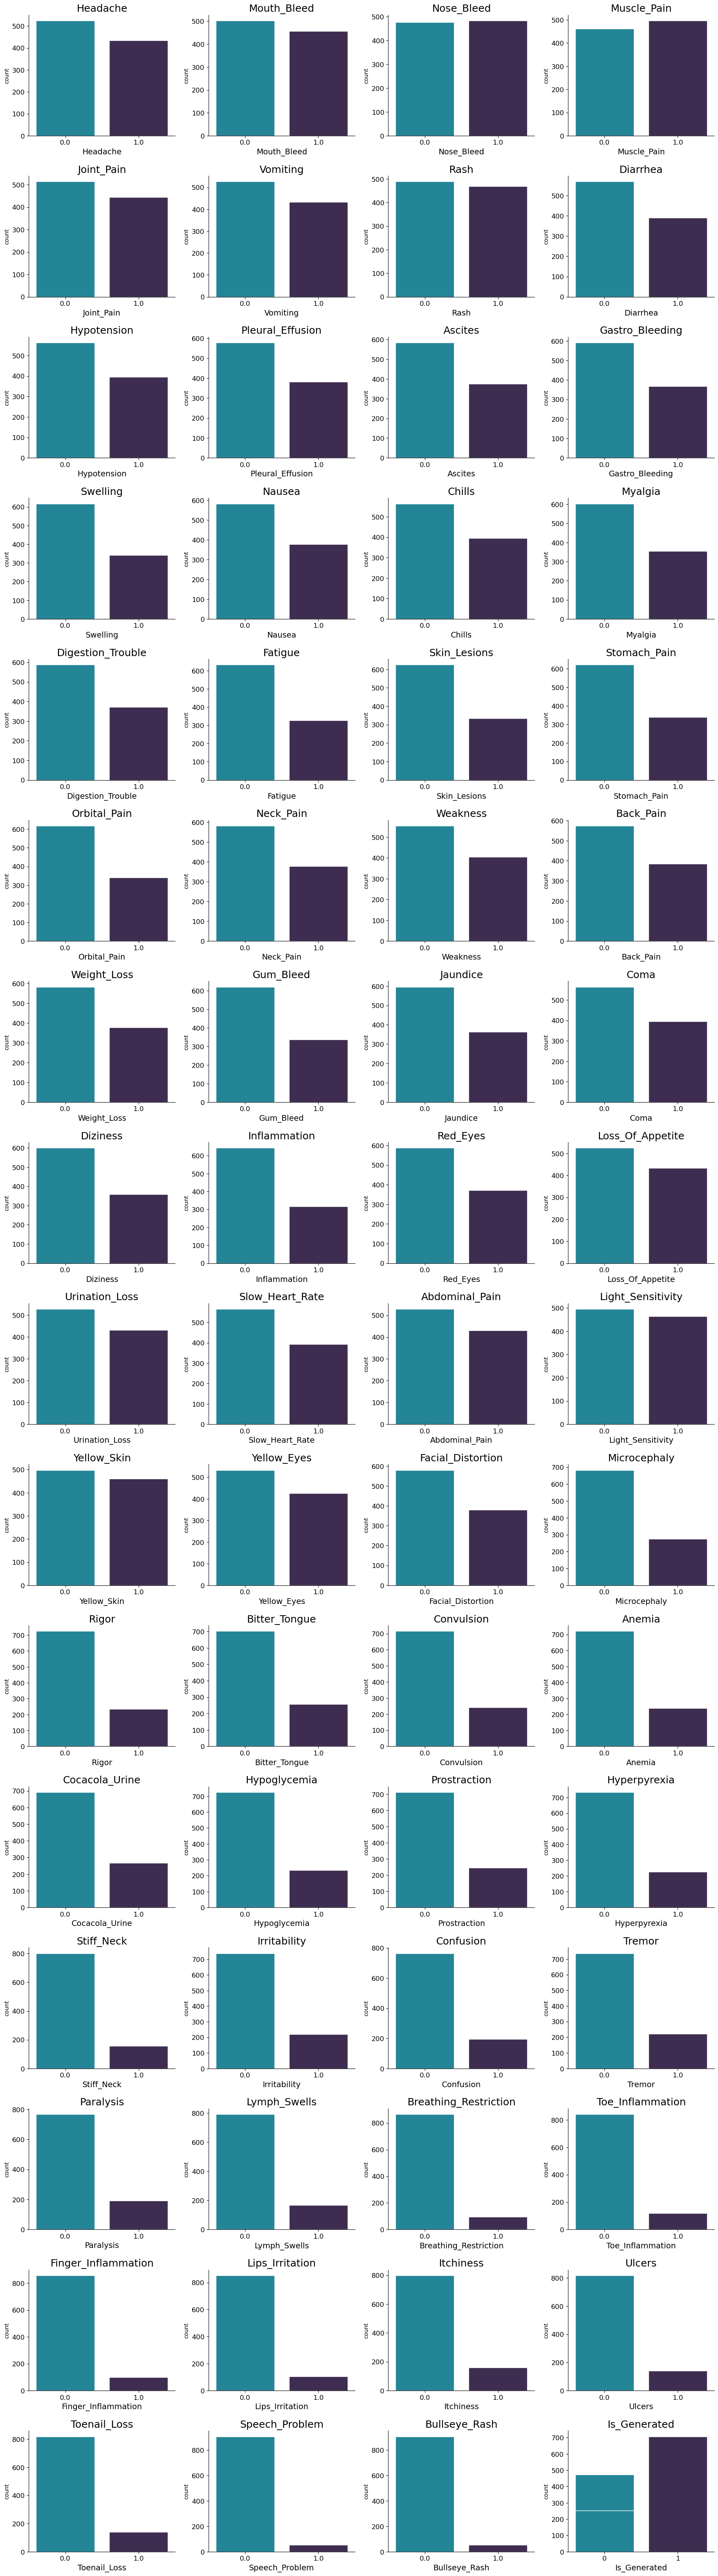

In [12]:
my_palette = ['#1192AA','#3E2756']
plot_countplots(full_train, 4, my_palette)

# <h2 style = "font-family: Georgia;font-weight: bold; font-size: 30px; color: #1192AA; text-align:left">Preprocess</h2>

In [13]:
# Create a dictionary mapping each disease name to a corresponding integer value
target_map = {
    'Lyme_disease': 0,
    'Tungiasis': 1,
    'Zika': 2,
    'Rift_Valley_fever': 3,
    'West_Nile_fever': 4,
    'Malaria': 5,
    'Chikungunya': 6,
    'Plague': 7,
    'Dengue': 8,
    'Yellow_Fever': 9,
    'Japanese_encephalitis': 10
}
swapped_map = {v: k for k, v in target_map.items()}
full_train['prognosis'] = full_train['prognosis'].replace(target_map).astype(int)

# Concatenate train and original dataframes, and prepare train and test sets
X_train = full_train.drop(['prognosis'], axis=1).reset_index(drop=True).astype(int)
y_train = full_train['prognosis'].reset_index(drop=True)
X_test = test.reset_index(drop=True).astype(int)
X_train_ori, X_test_ori = X_train.copy(), X_test.copy()

# # Add dimension_reduction Featrues
# umap_n_components = 5
# decomp = Decomp(n_components=umap_n_components, method='umap', scaler_method=None)
# umap_train = decomp.dimension_reduction(X_train).reset_index(drop=True)
# umap_test = decomp.transform(X_test).reset_index(drop=True)
# print(f'  --> UMAP(n_components={umap_n_components})')

# # Concat Data
# X_train = pd.concat([X_train_ori, umap_train], axis=1).reset_index(drop=True)
# X_test = pd.concat([X_test_ori, umap_test], axis=1).reset_index(drop=True)
# # X_train, X_test = X_train_ori.copy(), X_test_ori.copy()

print("")
print(f"X_train shape :{X_train.shape}")
print(f"y_train shape :{y_train.shape}")
print(f"X_test shape :{X_test.shape}")

# Delete the train and test dataframes to free up memory
del train, test, full_train, origin

X_train.head(5)


X_train shape :(959, 65)
y_train shape :(959,)
X_test shape :(303, 65)


,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,is_generated
0,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
3,0,0,1,1,1,1,0,1,0,1,1,0,0,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1


# <h2 style = "font-family: Georgia;font-weight: bold; font-size: 30px; color: #1192AA; text-align:left">Models</h2>

Thanks to [@tetsutani](https://www.kaggle.com/tetsutani) and his work https://www.kaggle.com/code/tetsutani/ps3e13-eda-decomposition-ensemble-rankpredict/notebook#Train-Model-by-K-fold

In [14]:
class Splitter:
    def __init__(self, kfold=True, n_splits=5):
        self.n_splits = n_splits
        self.kfold = kfold

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val
        else:
            raise ValueError(f"Invalid kfold: Must be True")

class Classifier:
    def __init__(self, n_estimators=100, device="cpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.len_models = len(self.models)
        
    def _define_model(self):
        
        xgb_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.05,
            'max_depth': 6,
            'subsample': 0.8,
            'colsample_bytree': 0.1,
            'n_jobs': -1,
            'eval_metric': 'mlogloss',
            'objective': 'multi:softprob',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': self.random_state,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
        
        lgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 6,
            'learning_rate': 0.05,
            'subsample': 0.20,
            'colsample_bytree': 0.5,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'multiclass',
            'metric': 'multi_logloss',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state
        }
                
        cb_params = {
            'iterations': self.n_estimators,
            'depth': 6,
            'learning_rate': 0.1,
            'l2_leaf_reg': 0.7,
            'random_strength': 0.2,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 70,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'MultiClass',
            'loss_function': 'MultiClass',
            'task_type': self.device.upper(),
            'random_state': self.random_state
        }
                
        models = {
            'svc': SVC(gamma="auto", probability=True, random_state=self.random_state),
            'xgb': xgb.XGBClassifier(**xgb_params),
            'lgb': lgb.LGBMClassifier(**lgb_params),
            'cat': CatBoostClassifier(**cb_params),
            'brf': BalancedRandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=self.random_state),
            'rf': RandomForestClassifier(n_estimators=1000, random_state=self.random_state),
            'knn': KNeighborsClassifier(n_neighbors=5),
            'mlp': MLPClassifier(random_state=self.random_state, max_iter=1000)
        }
        
        return models

In [15]:
class OptunaWeights:
    def __init__(self, random_state, n_trials=2000):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 1e-12, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds), axis=0, weights=weights)

        # Calculate the Logloss score for the weighted prediction
        score = log_loss(y_true, weighted_pred)
        return score

    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        self.study = optuna.create_study(sampler=sampler, study_name="OptunaWeights", direction='minimize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds), axis=0, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights

In [16]:
kfold = True
n_splits = 1 if not kfold else 10
random_state = 42
random_state_list = [42]
n_estimators = 9999
early_stopping_rounds = 333
verbose = False
device = 'cpu'

splitter = Splitter(kfold=kfold, n_splits=n_splits)

# Initialize an array for storing test predictions
test_predss = np.zeros((X_test.shape[0], len(y_train.unique())))
ensemble_score = []
weights = []
trained_models = {'xgb':[], 'lgb':[], 'cat':[], 'rf':[]}
rank_df = pd.DataFrame(columns=swapped_map.keys(), index=X_test.index).fillna(0)

    
for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    # Get a set of Regressor models
    classifier = Classifier(n_estimators, device, random_state)
    models = classifier.models
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        if name in ['xgb', 'lgb', 'cat']:
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds, verbose=verbose)
        else:
            model.fit(X_train_, y_train_)
            
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
        
        test_pred = model.predict_proba(X_test)
        y_val_pred = model.predict_proba(X_val)

        score = log_loss(y_val, y_val_pred)
        print(f'{name} [FOLD-{n} SEED-{random_state_list[m]}] Logloss score: {score:.5f}')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
    
    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
    score = log_loss(y_val, y_val_pred)
    print(f'Ensemble [FOLD-{n} SEED-{random_state_list[m]}] Logloss score {score:.5f}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    
    # Predict to X_test by the best ensemble weights
    _test_preds = optweights.predict(test_preds)
    test_predss += _test_preds / (n_splits * len(random_state_list))
    
    # Rank Prediction
    for i in range(_test_preds.shape[0]):
        arr = _test_preds[i]
        sorted_indices = np.argsort(arr)
        for k, p in zip(range(1, 10), [9, 8, 7, 6, 5, 4, 3, 2, 1]):
            second_largest_index = sorted_indices[-k]
            rank_df.loc[i, second_largest_index] += p
    
    gc.collect()

svc [FOLD-0 SEED-42] Logloss score: 1.57728
xgb [FOLD-0 SEED-42] Logloss score: 1.42460
lgb [FOLD-0 SEED-42] Logloss score: 1.46033
cat [FOLD-0 SEED-42] Logloss score: 1.50712
brf [FOLD-0 SEED-42] Logloss score: 1.56365
rf [FOLD-0 SEED-42] Logloss score: 1.55196
knn [FOLD-0 SEED-42] Logloss score: 11.44546
mlp [FOLD-0 SEED-42] Logloss score: 3.26602
Ensemble [FOLD-0 SEED-42] Logloss score 1.42146
svc [FOLD-1 SEED-42] Logloss score: 1.77541
xgb [FOLD-1 SEED-42] Logloss score: 1.70350
lgb [FOLD-1 SEED-42] Logloss score: 1.75734
cat [FOLD-1 SEED-42] Logloss score: 1.78497
brf [FOLD-1 SEED-42] Logloss score: 1.79025
rf [FOLD-1 SEED-42] Logloss score: 2.08949
knn [FOLD-1 SEED-42] Logloss score: 13.19798
mlp [FOLD-1 SEED-42] Logloss score: 3.92177
Ensemble [FOLD-1 SEED-42] Logloss score 1.70319
svc [FOLD-2 SEED-42] Logloss score: 1.66969
xgb [FOLD-2 SEED-42] Logloss score: 1.65372
lgb [FOLD-2 SEED-42] Logloss score: 1.69509
cat [FOLD-2 SEED-42] Logloss score: 1.72516
brf [FOLD-2 SEED-42] Log

In [17]:
# Calculate the mean LogLoss score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble Logloss score {mean_score:.5f} ± {std_score:.5f}')

# Print the mean and standard deviation of the ensemble weights for each model
print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name}: {mean_weight:.5f} ± {std_weight:.5f}')

Ensemble Logloss score 1.59194 ± 0.07928
--- Model Weights ---
svc: 0.12124 ± 0.17051
xgb: 0.54003 ± 0.31627
lgb: 0.52052 ± 0.31907
cat: 0.36226 ± 0.31551
brf: 0.04723 ± 0.06851
rf: 0.05186 ± 0.09245
knn: 0.00177 ± 0.00418
mlp: 0.00964 ± 0.02360


In [18]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e13/sample_submission.csv')
for i in range(test_predss.shape[0]):
    rank_list = list(rank_df.iloc[i, :].sort_values(0, ascending=False).iloc[:3].index)
    sub.loc[i, 'prognosis'] = ' '.join([swapped_map[_] for _ in rank_list])
    
# Save submission file
sub.to_csv('submission_rank.csv', index=False)
sub

,id,prognosis
0,707,Rift_Valley_fever Tungiasis Dengue
1,708,Dengue Chikungunya Malaria
2,709,West_Nile_fever Japanese_encephalitis Zika
3,710,Japanese_encephalitis Rift_Valley_fever Tungiasis
4,711,West_Nile_fever Zika Malaria
...,...,...
298,1005,Zika Yellow_Fever West_Nile_fever
299,1006,Malaria Lyme_disease Plague
300,1007,Plague Lyme_disease West_Nile_fever
301,1008,Rift_Valley_fever West_Nile_fever Zika


In [19]:
# sub = pd.read_csv('/kaggle/input/playground-series-s3e13/sample_submission.csv')
# df = pd.DataFrame(test_predss, columns=swapped_map.values())
# sub['prognosis'] = df.apply(lambda x: ' '.join(x.nlargest(3).index.tolist()), axis=1)
# sub.to_csv('submission.csv', index=False)
# sub